# Chapter 4

Selected exercises from ISLR - Chapter 4. Solutions are written in python.

First, let's import all the packages required to run the exercises below.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import copy
import statsmodels.api as sm

Links to the exercises in this notebook: <br>
[Exercise 10](#exercise-10) <br>
[Exercise 11](#exercise-11) <br>

<a id='exercise-10'></a>
## Exercise 10

This question involves the `Weekly` dataset: 

In [51]:
data = pd.read_csv('data/Weekly.csv')
data['Direction'] = data['Direction'].apply(lambda x: 1 if x=='Up' else 0)   # Transform Up=1, Down=0 

### 10.a 
Numerical and graphical summaries of the Weekly data

In [6]:
data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [10]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


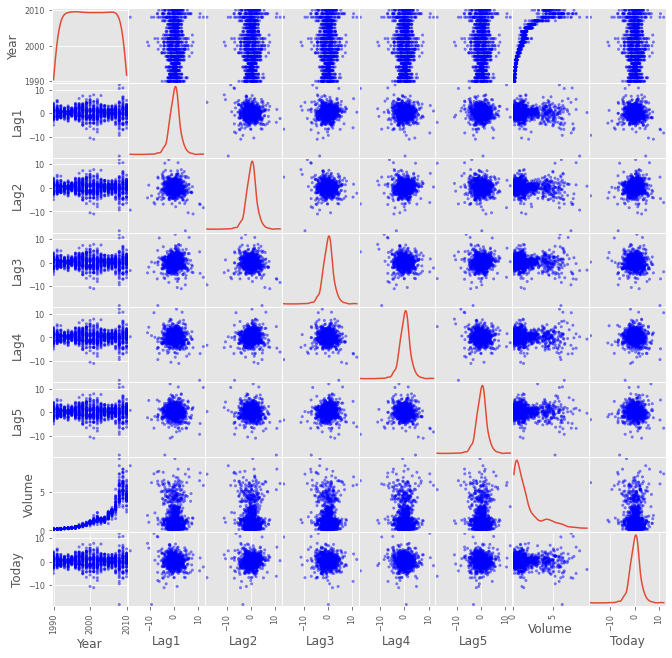

In [16]:
scatterplot = pd.plotting.scatter_matrix(data, figsize = (11, 11), diagonal = 'kde', color='blue')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


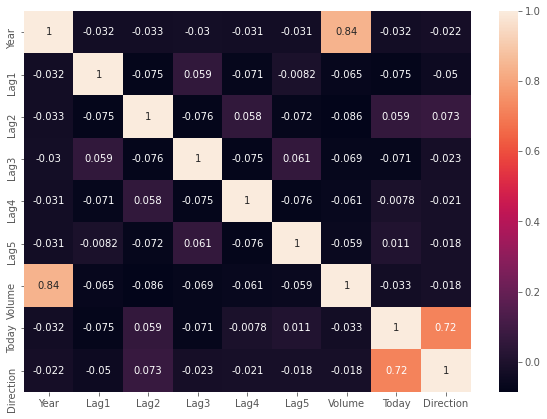

In [52]:
corr_matrix = data.corr()    # Compute Pearson's correlation
display(corr_matrix)
plt.subplots(figsize=(10,7)) 
sns.heatmap(corr_matrix, annot = True)
plt.show()

- It seems like there is a non-linear relationship between `Year` and `Volume`.
- There is a relationship between `Today` and `Direction (UP)` (expected, since `Today` represents the percentage return of the week)

### 10.b
Perform a logistic regression with `Direction` as the response and five lag variables plus `Volume` as predictors. Comment on the results.

In [69]:
response = 'Direction'
predictors = np.array(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'])
X = sm.add_constant(data[predictors])
log_reg = sm.Logit(data[response], X).fit()
display(log_reg.summary())
print(f'The significant predictors are: {predictors[log_reg.pvalues.values[1:] < 0.05]}')
print(f'The non-significant predictors are: {predictors[log_reg.pvalues.values[1:] >= 0.05]}')

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                0.006580
Time:                        18:13:22   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

The significant predictors are: ['Lag2']
The non-significant predictors are: ['Lag1' 'Lag3' 'Lag4' 'Lag5' 'Volume']


### 10.c

Instead of relying on llibraries, I create my own confusion matrix:

In [71]:
predictions = log_reg.predict(X)

In [165]:
def confusion_matrix(predictions, ground_truth, threshold, positive_class):
    negative_class = np.delete(np.unique(data[response]), 1)[0]
    discrete_predictions = np.array([1 if i > threshold else 0 for i in predictions])
    true_positives = np.sum(discrete_predictions[ground_truth[ground_truth == positive_class].index] == positive_class)
    true_negatives = np.sum(discrete_predictions[ground_truth[ground_truth == negative_class].index] == negative_class)
    false_positives = np.sum(discrete_predictions[ground_truth[ground_truth == negative_class].index] == positive_class)
    false_negatives = np.sum(discrete_predictions[ground_truth[ground_truth == positive_class].index] == negative_class)
    
    actual_positives = true_positives + false_negatives
    actual_negatives = true_negatives + false_positives
    predicted_positives = true_positives + false_positives
    predicted_negatives = true_negatives + false_negatives 
    recall = true_positives / actual_positives
    precision = true_positives / predicted_positives    
    
    df = pd.DataFrame({'' : ['Positive (Actual)', 'Negative (Actual)', 'Total (Predicted)'],
                       'Positive (Predicted)': [true_positives, false_positives, predicted_positives],
                       'Negative (Predicted)': [false_negatives, true_negatives, predicted_negatives],
                       'Total (Actual)': [actual_positives, actual_negatives, actual_positives + actual_negatives]
                      }).set_index([''])
    display(df)

    print(f'Correctly predicted positives: {round(recall * 100,2)}%')
    print(f'Correctly predicted negatives: {round(true_negatives / actual_negatives * 100, 2)}%')
    print(f'Total correct predictions: {round((true_positives + true_negatives) * 100 / (actual_negatives + actual_positives), 2)}%')

    print(f'Precision: {round(precision, 2)}')
    print(f'Recall: {round(recall, 2)}')

In [139]:
confusion_matrix(predictions, data[response], threshold=0.5, positive_class=1)

,Positive (Predicted),Negative (Predicted),Total (Actual)
,,,
Positive (Actual),557,48,605
Negative (Actual),430,54,484
Total (Predicted),987,102,1089


Correctly predicted positives: 92.07%
Correctly predicted negatives: 11.16%
Total correct predictions: 56.11%
Precision: 0.56
Recall: 0.92


### 10.d

Fit the **logistic regression** using as training data the instances from 1990 to 2008 and as test data those from 2009-2010. Only use `Lag2` as predictor.
Instead of using a library, I'll code my simple logistic regression from scratch.

#### Logistic regression and Maximum Likelihood Estimation <span style="background-color: #FFC300">[Theory]</span>

Formally, the logistic regression model is:

$$  \log{\dfrac{p(x)}{1 - p(x)}} = \mathsf{\beta_0} + \beta_1 x  $$ 

and solving for $p(x)$:

$$  p(x) = \dfrac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}} = \sigma(\beta_0, \beta_1) $$ 

To choose values for the parameters, we use maximum likelihood estimation (MLE). So, we first need to express the log-likelihood. The probability of one datapoint is:

$$   p(Y = y | X = x) = \text{Ber}(y | x) = p(x)^y \ [1 - p(x)]^{1 - y}  $$ 

The likelihood of all *N* data can be written as:

$$  L(\beta_0, \beta_1) = \prod_i^N {p(x_i)^{y_i} \ [1 - p(x_i)]^{1 - y_i}} = \prod_i^N  \Bigl(\dfrac{e^{\beta_0 + \beta_1 x_i}}{1 + e^{\beta_0 + \beta_1 x_i}}\Bigr)^{y_i} \Bigl(1 - \dfrac{e^{\beta_0 + \beta_1 x_i}}{1 + e^{\beta_0 + \beta_1 x_i}}\Bigr)^{1 - y_i}  $$  

So, the log-likelihood $LL(\beta_0, \beta_1)$ is: 

$$  LL(\beta_0, \beta_1) = \sum_i^N y_i \log p(x_i) + (1 - y_i) \log(1 - p(x_i)) = $$
$$ = \sum_i^N y_i \log p(x_i) - y_i \log(1 - p(x_i)) + \log(1 - p(x_i)) =  $$
$$ = \sum_i^N y_i \bigl(\log p(x_i) - \log( 1 - p(x_i)) \bigr) + \log(1 - p(x_i)) = $$
$$ = \sum_i^N y_i \log \Bigl( \dfrac{p(x_i)}{1 - p(x_i)} \Bigr) + \log( 1 - p(x_i))  $$

MLE consists in finding the parameters $\beta_0$ and $\beta_1$ that maximize the log-likelihood (or alternatively, that minimize the negative log-likelihood). <br>The derivative $\dfrac{\delta LL(\beta_0, \beta_1)}{\delta \beta_i} = 0$ cannot be solved in closed form. Then, we need to use an optimization algorithm. <br>

First, let's find the derivative using the **Chain rule**. Other methods can be used, but the chain rule is the easiest and it is scalable. Scalability is a nice feature since logistic regression is one of the main building blocks of neural networks.

For one datapoint:

$$ \dfrac{\delta LL(\beta_0, \beta_1)}{\delta \beta_j} = \color{#D7A9E3FF}{\dfrac{\delta LL(\beta_0, \beta_1)}{\delta p(x)}} \cdot \color{#8BBEE8FF}{\dfrac{\delta p(x)}{\delta z}} \cdot  \color{#A8D5BAFF}{\dfrac{\delta z}{\delta \beta_j}}  $$

where $z = \beta^T x$.

Let's unpack each component:

$$ \color{#D7A9E3FF}{\dfrac{\delta LL(\beta_0, \beta_1)}{\delta p(x)}} = y \ \Bigl[\frac{1 - p(x)}{p(x)}\Bigr] \ \Bigl[ \frac{1}{(1 - p(x))^2} \Bigr] - \frac{1}{1 - p(x)} = \frac{y - p}{p \ (1 - p(x))}$$ 

$$ \color{#8BBEE8FF}{\dfrac{\delta p(x)}{\delta z}} = \frac{\delta}{\delta z}\frac{e^z}{1 + e^z} = \frac{e^z}{(1 + e^z)^2} $$ 

$$ \color{#A8D5BAFF}{\dfrac{\delta z}{\delta \beta_j}} = \frac{\delta}{\beta_j} \beta^T x = x $$

Now that each component is computed, we simply multiply them together:

$$ \dfrac{\delta LL(\beta_0, \beta_1)}{\delta \beta_j}  = \frac{y - p(x)}{p(x) \ (1 - p(x))} \cdot \frac{e^z}{(1 + e^z)^2} \cdot x = $$

$$ = \dfrac{y - \dfrac{e^z}{1 + e^z}}{\bigl(1 - \frac{e^z}{1+e^z} \bigr) (1 + e^z)} =  \color{red}{\boxed{[y - \sigma(\beta_0, \beta_1)] x }}  \ \ \ \ 😊 $$

To maximize the derivative, we can use Gradient Ascent Optimization:

$$ \beta^{new}_j = \beta_j^{old} + \alpha \frac{\delta LL(\beta^{old})}{\beta_j^{old}} = $$

$$ = \beta_j^{old} + \alpha \sum_{i=1}^N \bigl[y_i - \sigma(\beta_0, \beta_1) \bigr] x_i $$

In [238]:
class Logistic_Regression():
    def __init__(self):
        self.intercept  = 0
        self.beta_1 = 0
    
    def fit(self, Y, x, plot=False, iterations=2, alpha = 0.01):
        """
        params:
            Y: horizontal array
            x: horizontal array
        """
        X = np.zeros((x.shape[0], 2))
        X[:, 0] = 1
        X[:, 1] = x
        beta_1_list = []
        intercept_list = []
        # Optimize the derivative of the log-likelihood as explained above
        for j in range(0, iterations):
            grad_intercept = 0
            grad_beta = 0
            for i in range(0, x.shape[0]):
                logistic = np.exp(self.intercept + self.beta_1 * X[i, 1]) / (1 + np.exp(self.intercept + self.beta_1 * X[i, 1]))
                grad_intercept += (Y[i] - logistic) * X[i, 0]
                grad_beta += (Y[i] - logistic) * X[i, 1]
            self.intercept = self.intercept + alpha * grad_intercept
            self.beta_1 = self.beta_1 + alpha * grad_beta
            beta_1_list.append(self.beta_1)
            intercept_list.append(self.intercept)
        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(13, 5))
            axs[0].plot(intercept_list)
            axs[0].set_title('Intercept')
            axs[1].plot(beta_1_list)
            axs[1].set_title('Beta_1')
            plt.show()
        print(self.intercept, self.beta_1)       

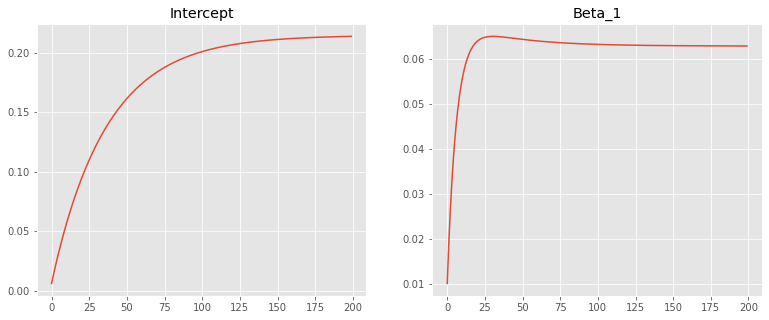

0.21378434580664007 0.06281626991830191


In [243]:
logistic_reg = Logistic_Regression()
logistic_reg.fit(data[response], data['Lag2'], iterations = 200, plot=True, alpha=0.0001)

To check that my implementation is correct, I use the method `statsmodel.Logit`:

In [162]:
predictors = np.array(['Lag2'])
response = 'Direction'
train_X = sm.add_constant(data[predictors][(data['Year'] >= 1990) & (data['Year'] <= 2008)].reset_index(drop=True))
train_Y = data[response][(data['Year'] >= 1990) & (data['Year'] <= 2008)].reset_index(drop=True)
test_X = sm.add_constant(data[predictors][(data['Year'] >= 2009) & (data['Year'] <= 2010)].reset_index(drop=True))
test_Y = data[response][(data['Year'] >= 2009) & (data['Year'] <= 2010)].reset_index(drop=True)

log_reg = sm.Logit(train_Y, train_X).fit()
display(log_reg.summary())
print(f'The significant predictors are: {predictors[log_reg.pvalues.values[1:] < 0.05]}')
print(f'The non-significant predictors are: {predictors[log_reg.pvalues.values[1:] >= 0.05]}')

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:                0.003076
Time:                        20:06:30   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

The significant predictors are: ['Lag2']
The non-significant predictors are: []


Let's see how my logistic regression method and `sm.Logit` divide the data:

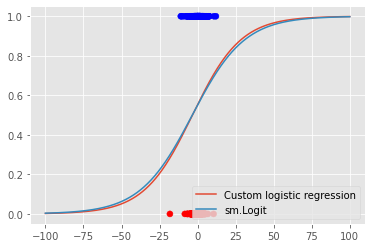

In [268]:
x1, x2 = -100, 100
plt.scatter(data['Lag2'], data[response], c=['red' if i==0 else 'blue' for i in data[response]])
custom_logit = np.exp(logistic_reg.intercept + np.arange(x1, x2, 0.001)*logistic_reg.beta_1) / (1 + np.exp(logistic_reg.intercept + np.arange(x1, x2, 0.001)*logistic_reg.beta_1))
sm_logit = np.exp(0.2033 + np.arange(x1, x2, 0.001)*0.0581) / (1 + np.exp(0.2033 + np.arange(x1, x2, 0.001)*0.0581))
plt.plot(np.arange(x1, x2, 0.001), custom_logit)
plt.plot(np.arange(x1, x2, 0.001), sm_logit)
plt.legend(['Custom logistic regression', 'sm.Logit'])
plt.show()

The two models are very similar. My implementation is correct.

In [322]:
predictions = log_reg.predict(test_X)

In [167]:
confusion_matrix(predictions, test_Y, 0.5, 1)

,Positive (Predicted),Negative (Predicted),Total (Actual)
,,,
Positive (Actual),56,5,61
Negative (Actual),34,9,43
Total (Predicted),90,14,104


Correctly predicted positives: 91.8%
Correctly predicted negatives: 20.93%
Total correct predictions: 62.5%
Precision: 0.62
Recall: 0.92


The percentage of correctly predicted positives is very high, but the perecentage of correctly predicted negatives is very low.

### 10.e
Repeat using Linear Discriminant Analysis (LDA).

#### Linear Discriminant Analysis <span style="background-color: #FFC300">[Theory]</span>
LDA models the posterior distribution $P(\text{Y} = k | \text{X} = x)$ from a Bayesian perspective. In LDA, we model the distribution of the predictors X separetly in each of the response classes, and use Bayes theorem th predict the posterior.
The prior $\pi_k$ is simply the probability of each class (so, the fraction of instances in that class). The likelihood $f_k(x)$ is supposed to be univariate or multivariate Gaussian. That is, the probability $P(\text{X} = x | \text{Y} = k)$ - or the distribution of data per class - is Gaussian. The evidence is then: $P(\text{X}) = \sum_{l=1}^K P(\text{X}, \text{Y}_l) = \sum_{l=1}^K f_l(x) * \pi_l $.

Given these assumptions, the posterior is:

$$ P(\text{Y} = k \ | \ \text{X}) = \dfrac{\pi_k \cdot f_k(x)}{\sum_{l=1}^K f_l(x) * \pi_l } $$

If we take the logarithm of this quantity (unrolling $f_k(x)$) and taking out all the values that do not depend on $k$, we obtain:

$$ \delta_k(x) = \log(\pi_k) + x \frac{\mu_k}{2 \sigma^2} - \frac{\sigma^2}{2 \sigma^2} $$

We assign the datapoint $x$ to the class $k$ for which $\delta_k(x)$ is largest.

Important: $\sigma^2$ is considered to be equal among all the classes $\sigma^2_1 = \sigma^2_2 = ... = \sigma^2_K $. In practice, when we need to compute it, we calculate it as the average of the variances among all the K classes.

In [372]:
class LDA:
    # LDA model for 1 predictor and only 2 classes
    def __init__(self):
        self.prior = []
        self.mu = []
        self.sigma_sq = 0 
        self.classes = None
    
    def fit(self, X, Y):
        # X and Y are both dataframes.
        self.classes = np.unique(Y)
        print(f'Classes are: {self.classes}')
        for classe in self.classes:
            self.prior.append(Y[Y==classe].shape[0]/Y.shape[0])
            self.mu.append(np.mean(X[Y[Y==classe].index]))
            self.sigma_sq += np.sum((X[Y[Y==classe].index] - self.mu[-1])**2) 
        self.sigma_sq = 1 / (Y.shape[0] - len(self.classes)) * self.sigma_sq
    
    def predict(self, X):
        # Returns a dataframe containing the class per datapoint.
        preds = np.array([])
        delta = np.array([])
        for idx in range(0, len(self.classes)):
            pred_k = X * self.mu[idx] / self.sigma_sq - self.mu[idx]**2 / (2 * self.sigma_sq) + np.log(self.prior[idx])
            if preds.shape[0] == 0:
                preds = pred_k
            else:
                preds = np.vstack((preds, pred_k))
        for idx in range(0, len(preds[0])):
            k = np.argmax(preds[:, idx])
            delta = np.append(delta, self.classes[k])
        return pd.Series(delta)
            

In [373]:
lda = LDA()
lda.fit(train_X.iloc[:, 1], train_Y)
predictions = lda.predict(test_X.iloc[:, 1])

Classes are: [0 1]


In [376]:
confusion_matrix(predictions, test_Y, 0.5, 1)

,Positive (Predicted),Negative (Predicted),Total (Actual)
,,,
Positive (Actual),56,5,61
Negative (Actual),34,9,43
Total (Predicted),90,14,104


Correctly predicted positives: 91.8%
Correctly predicted negatives: 20.93%
Total correct predictions: 62.5%
Precision: 0.62
Recall: 0.92


LDA and Logistic Regression result in the same confusion matrix.

### 10.f
Repeat using QDA.
As in LDA, observations are assumed to be drawn from a Gaussian distribution when using QDA as well. However, unlike LDA, in QDA each Gaussin is assumed to have its own variance (or covariance matrix). In other words, $\sigma^2_k$ depends on the class (while previously we assumed $\sigma^2$ to be the average among the variances across all the classes. <br> This means that we need tho recalculate $\delta_k$ to take into account the influence of $\sigma^2$. In case the predictor space is higher than 1, we need to include the covariance matrix instead of the variance.

$$ \delta_k(x) = \log(\pi_k) + \log(\frac{1}{\sqrt{2 \pi \sigma_k^2}}) - \frac{(x - \mu)^2}{2 \sigma_k^2}$$ 


In [379]:
class QDA:
    # QDA model for 1 predictor and an arbitrary number of classes.
    def __init__(self):
        self.prior = []
        self.mu = []
        self.sigma = []
        self.classes = None
    
    def fit(self, X, Y):
        # X and Y are both dataframes.
        self.classes = np.unique(Y)
        print(f'Classes are: {self.classes}')
        for classe in self.classes:
            self.prior.append(Y[Y==classe].shape[0] / Y.shape[0])
            self.mu.append(np.mean(X[Y[Y==classe].index]))
            self.sigma.append(np.std(X[Y[Y==classe].index]))
    
    def predict(self, X):
        # Returns a dataframe containing the class per datapoint.
        preds = np.array([])
        delta = np.array([])
        for idx in range(0, len(self.classes)):
            pred_k = np.log(self.prior[idx]) - (X - self.mu[idx])**2 / (2 * self.sigma[idx]**2) + np.log(1 / np.sqrt(2 * np.pi * self.sigma[idx]**2)) 
            if preds.shape[0] == 0:
                preds = pred_k
            else:
                preds = np.vstack((preds, pred_k))
        for idx in range(0, len(preds[0])):
            k = np.argmax(preds[:, idx])
            delta = np.append(delta, self.classes[k])
        return pd.Series(delta)

In [380]:
qda = QDA()
qda.fit(train_X.iloc[:, 1], train_Y)
predictions = qda.predict(test_X.iloc[:, 1])

Classes are: [0 1]


In [381]:
confusion_matrix(predictions, test_Y, 0.5, 1)

,Positive (Predicted),Negative (Predicted),Total (Actual)
,,,
Positive (Actual),61,0,61
Negative (Actual),43,0,43
Total (Predicted),104,0,104


Correctly predicted positives: 100.0%
Correctly predicted negatives: 0.0%
Total correct predictions: 58.65%
Precision: 0.59
Recall: 1.0


QDA correctly classifies all the observations for the positive class, but misclassifies all the observations for the negative class.

### 10.g
Repeat using KNN, where K=1. As I did with the other methods, I code the KNN from scratch instead of using a library.

In KNN, we assign the class to a new observation based on the closer K train data.

In [485]:
class KNN:
    def __init__(self, K):
        self.K = K
        
    def fit(self, X, Y):
        self.train_data = pd.DataFrame({'X': X, 'Y': Y})
    
    def predict(self, X):
        preds = []
        for x in X:
            self.train_data['dist'] = np.abs(self.train_data['X'] - x)
            temp_train_data = copy.deepcopy(self.train_data)
            classes = []
            for k in range(0, self.K):
                idx_min_dist = temp_train_data['dist'].idxmin()
                classes.append(temp_train_data.loc[idx_min_dist, 'Y'])
                temp_train_data.drop(idx_min_dist, inplace=True)
            values, counts = np.unique(np.array(classes), return_counts=True)
            ind = np.argmax(counts)
            preds.append(values[ind])             
        return pd.Series(preds)

In [488]:
knn = KNN(1)
knn.fit(train_X.iloc[:, 1], train_Y)
predictions = knn.predict(test_X.iloc[:, 1])
confusion_matrix(predictions, test_Y, 0.5, 1)

,Positive (Predicted),Negative (Predicted),Total (Actual)
,,,
Positive (Actual),29,32,61
Negative (Actual),21,22,43
Total (Predicted),50,54,104


Correctly predicted positives: 47.54%
Correctly predicted negatives: 51.16%
Total correct predictions: 49.04%
Precision: 0.58
Recall: 0.48


KNN correctly classifies the observations for half the positive and half the negative classes.

### 10.h
To summarize:

Logistic regression: 62.5% correct classifications overall <br>
LDA: 62.5% correct classifications overall <br>
QDA: 58.65% correct classifications overall <br>
KNN: 49%  correct classifications overall<br>

The best result is provided by Logistic regression and LDA.

<a id='exercise-11'></a>
## Exercise 11
This exercise is very similar to exercise 10, so I will just do the first part (data exploration). <br>
Load dataset Auto and fix issues as done in previous chapters.

In [509]:
auto = pd.read_csv('data/Auto.csv')
auto.drop(auto[auto.values == '?'].index, inplace = True)
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto.drop('name', axis=1,inplace=True)

In [510]:
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### 11.a

In [511]:
# Column mpg01 contains 1 if the mpg value is above the median , else 0.
print(f'The median mpg is: {median_mpg}')
median_mpg = np.median(auto['mpg'].values)
auto['mpg01'] = auto['mpg'].apply(lambda x: 1 if x > median_mpg else 0)

The median mpg is: 22.75


In [512]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,1
393,44.0,4,97.0,52,2130,24.6,82,2,1
394,32.0,4,135.0,84,2295,11.6,82,1,1
395,28.0,4,120.0,79,2625,18.6,82,1,1


### 11.b
What features are most likely to be useful in predicting `mpg01`?

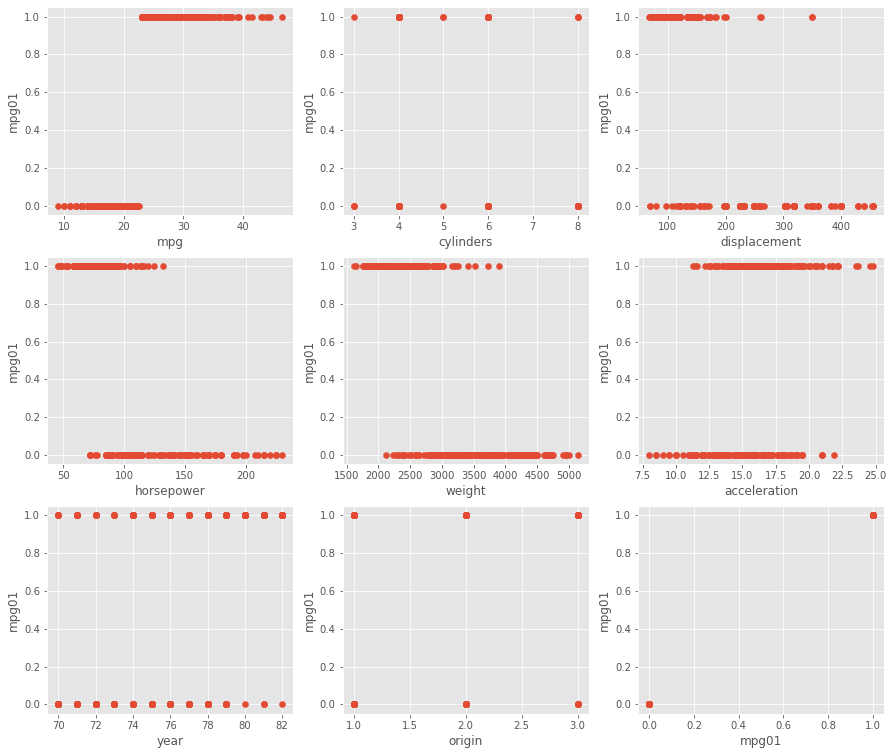

In [515]:
response = auto['mpg01']
fig, axs = plt.subplots(3, 3, figsize=(15, 13))
for idx, feature in enumerate(auto.columns):
    axs[int(idx/3)][idx%3].scatter(auto[feature], response)
    axs[int(idx/3)][idx%3].set_xlabel(f'{feature}')
    axs[int(idx/3)][idx%3].set_ylabel('mpg01')
plt.show()   

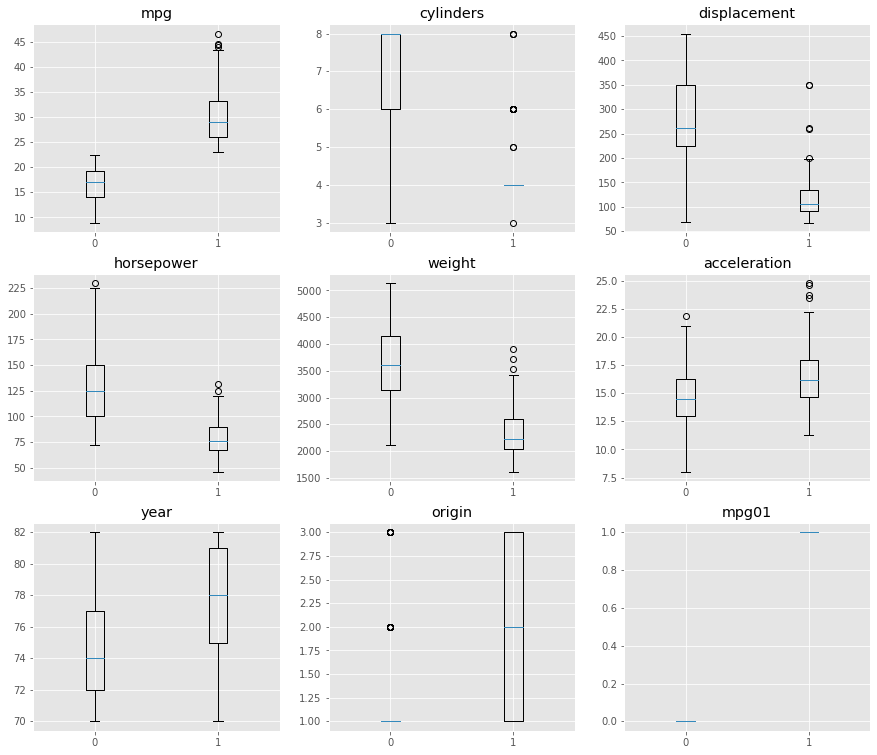

In [543]:
fig, axs = plt.subplots(3, 3, figsize=(15, 13))
for idx, feature in enumerate(auto.columns):
    my_dict = {'0': auto[feature][auto['mpg01']==0].values, '1': auto[feature][auto['mpg01']==1].values}
    axs[int(idx/3)][idx%3].boxplot(my_dict.values())
    axs[int(idx/3)][idx%3].set_xticklabels(my_dict.keys())
    axs[int(idx/3)][idx%3].set_title(f'{feature}')
plt.show() 

The features `acceleration`, `displacement`, `weight`, and `horsepower` seem to be predictive to certain extent.

Exercises d) - e) - f) - g) are very similar to exercise 10, so I will not re-do them.